# US data + extrapolation (test notebook)

## Simple extrapolation using logistic fitting

In [52]:
from scipy.optimize import curve_fit

### Logistic curve fitting on available data

In [53]:
def logistic_p0(X, Y): 
    
    L = np.max(Y)
    k = 1
    x_0 = np.median(X)
    y_0 = np.min(Y)
    
    return [L, k, x_0, y_0]

In [54]:
def logistic(X, L, k, x_0, y_0):
    
    return L / (1 + np.exp(-k * (X - x_0))) + y_0

In [55]:
def pred_region(region):

    N = len(dates)
    X = np.linspace(0, N-1, N)
    Y = region_cases.loc[region]

    p0 = logistic_p0(X, Y)
    popt, pcov = curve_fit(logistic, X, Y, p0)
    
    return popt, pcov

In [56]:
def pred_US_region(region):

    N = len(dates)
    X = np.linspace(0, N-1, N)
    Y = data_US_cases.loc[region]

    p0 = logistic_p0(X, Y)
    popt, pcov = curve_fit(logistic, X, Y, p0)
    
    return popt, pcov

In [57]:
def pred_all():
    
    N = len(dates)
    X = np.linspace(0, N-1, N)
    Y = sum_cases_adj

    p0 = logistic_p0(X, Y)
    popt, pcov = curve_fit(logistic, X, Y, p0)
    
    return popt, pcov

### Plotting prediction using fitted curve

In [58]:
def add_days(dates, add):
    last_date = dates[-1].split('/')
    current = datetime.datetime(int('20' + last_date[2]), int(last_date[0]), int(last_date[1]))
    
    raw_dates = [current + datetime.timedelta(days=d) for d in range(1, add+1)]
    form_dates = [str(date.month) + '/' + str(date.day) + '/' + str(date.year)[2:] for date in raw_dates]
    pred_dates = np.append(dates, form_dates)
    
    return pred_dates

In [59]:
def plot_pred_all(popt, pred_N=1.4):
    
    nrows = 1
    ncols = 1
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*14, nrows*11),
                             facecolor='black', subplot_kw=dict(facecolor='black'))
    
    # Current data
    cases_color = 'yellow'
    axes.plot(dates, sum_cases_adj, label='Confirmed',
              c=cases_color, lw=3)
    # Mark last real datapoint
    axes.axvline(x=dates[-1], c=cases_color, lw=2, ls='--')
    
    # Predicted data
    N = len(dates)
    pred_dates = add_days(dates, add=int(np.round(N*pred_N)) - N)
    pred_X = np.linspace(0, int(np.round(pred_N*(N-1))), int(np.round(pred_N*N)))
    axes.plot(pred_dates, logistic(pred_X, *popt), label='Logistic prediction',
              c='tab:red', lw=4, alpha=0.7)

    axes.set_title('COVID-19 Predicted number of cases', 
                   fontsize=axistitlesize, fontweight='bold', color='white')
    
    # Source text
    axes.text(x=0.16, y=-0.12, s='Source of data: https://github.com/CSSEGISandData/COVID-19/',
              c='white', fontsize=13, fontweight='book',
              horizontalalignment='center', verticalalignment='center', transform=axes.transAxes,
              bbox=dict(facecolor='black', alpha=0.2, lw=0))

    axes.set_xlabel('Time', fontsize=axislabelsize, color='white')
    axes.set_ylabel('Number of cases', fontsize=axislabelsize, color='white')

    axes.tick_params(axis='both', which='major', labelsize=axisticksize, colors='white')
    axes.set_xticks(pred_dates[::int(np.round(pred_N))*date_jump])
    axes.set_xticklabels(pred_dates[::int(np.round(pred_N))*date_jump], rotation=42, ha='center')

    # Should be placed after setting x-ticks!!!
    axes.set_xlim(pred_dates[0], pred_dates[-1])

    axes.legend(loc='upper left', fontsize=axislegendsize)

    plt.show()

In [60]:
def plot_pred_region(region, popt, pred_N=1.4):
    
    nrows = 1
    ncols = 1
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*14, nrows*11),
                             facecolor='black', subplot_kw=dict(facecolor='black'))
    
    # Current data
    cases_color = 'yellow'
    axes.plot(dates, region_cases.loc[region], label='Confirmed',
              c=cases_color, lw=3)
    # Mark last real datapoint
    axes.axvline(x=dates[-1], c=cases_color, lw=2, ls='--')
    
    # Predicted data
    N = len(dates)
    pred_dates = add_days(dates, add=int(np.round(N*pred_N)) - N)
    pred_X = np.linspace(0, int(np.round(pred_N*(N-1))), int(np.round(pred_N*N)))
    axes.plot(pred_dates, logistic(pred_X, *popt), label='Logistic prediction',
              c='tab:red', lw=4, alpha=0.7)

    axes.set_title('COVID-19 Predicted number of cases - {}'.format(region), 
                   fontsize=axistitlesize, fontweight='bold', color='white')
    
    # Source text
    axes.text(x=0.16, y=-0.12, s='Source of data: https://github.com/CSSEGISandData/COVID-19/',
              c='white', fontsize=13, fontweight='book',
              horizontalalignment='center', verticalalignment='center', transform=axes.transAxes,
              bbox=dict(facecolor='black', alpha=0.2, lw=0))

    axes.set_xlabel('Time', fontsize=axislabelsize, color='white')
    axes.set_ylabel('Number of cases', fontsize=axislabelsize, color='white')

    axes.tick_params(axis='both', which='major', labelsize=axisticksize, colors='white')
    axes.set_xticks(pred_dates[::int(np.round(pred_N))*date_jump])
    axes.set_xticklabels(pred_dates[::int(np.round(pred_N))*date_jump], rotation=42, ha='center')

    # Should be placed after setting x-ticks!!!
    axes.set_xlim(pred_dates[0], pred_dates[-1])

    axes.legend(loc='upper left', fontsize=axislegendsize)

    plt.show()

NameError: name 'date_jump' is not defined

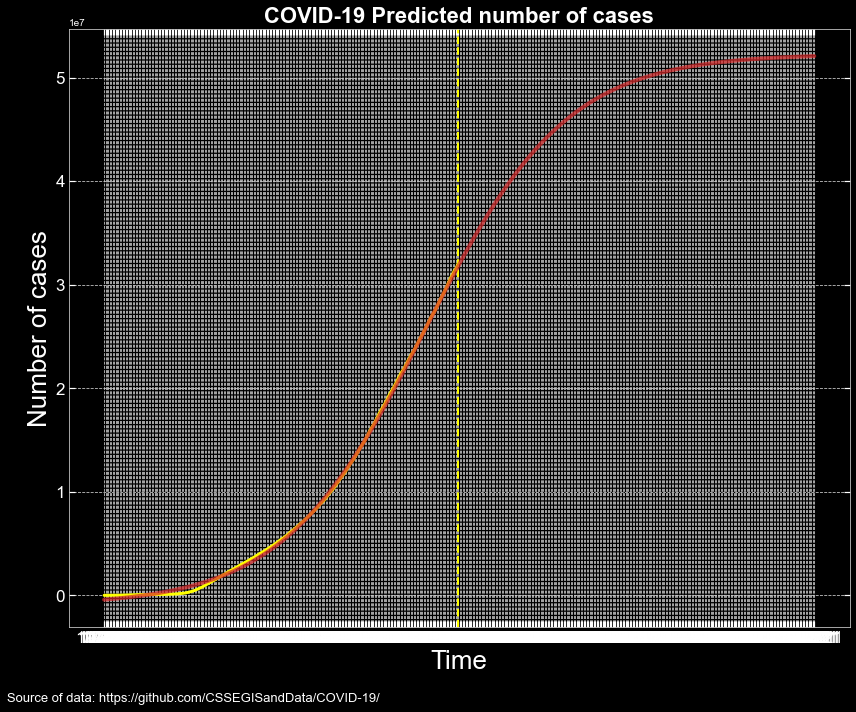

In [61]:
popt, pcov = pred_all()
plot_pred_all(popt, pred_N=2)

In [ ]:
region = 'Hungary'
popt, pcov = pred_region(region)
plot_pred_region(region, popt, pred_N=2)

## Retarded Polyfit

In [ ]:
def plot_us_region(region, mode='full'):
    
    nrows = 1
    ncols = 1
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*14, nrows*11),
                             facecolor='black', subplot_kw=dict(facecolor='black'))

    if mode.lower()=='full':
        cases_color = 'yellow'
        axes.plot(dates, data_US_cases.loc[region], label='Confirmed',
                  c=cases_color, lw=3)
        axes.fill_between(dates, data_US_cases.loc[region], color=cases_color, alpha=0.5)

        death_color = 'tab:red'
        axes.plot(dates, data_US_death.loc[region], label='Deaths',
                  c=death_color, lw=3)
        axes.fill_between(dates, data_US_death.loc[region], color=death_color, alpha=0.5)
        
        axes.set_title('COVID-19 Official number of historical cases - {}'.format(region), 
                   fontsize=axistitlesize, fontweight='bold', color='white')

    elif mode.lower()=='total':
        cases_color = 'yellow'
        region_total = data_US_cases.loc[region] - data_US_death.loc[region]
        axes.plot(dates, region_total, label='Active total',
                  c=cases_color, lw=3)
        axes.fill_between(dates, region_total, color=cases_color, alpha=0.5)
        
        axes.set_title('COVID-19 Official number of active cases - {}'.format(region), 
                   fontsize=axistitlesize, fontweight='bold', color='white')
    
    elif mode.lower()=='daily':
        cases_color = 'yellow'
        region_daily = np.zeros_like(data_US_cases.loc[region])
        
        # Set starting day value
        region_daily[0] = 0
        for i in range(len(data_US_cases.loc[region][1:])):
            now = data_US_cases.loc[region][i+1]
            prev = data_US_cases.loc[region][i]
            
            region_daily[i+1] = now - prev
            
        axes.plot(dates, region_daily, label='Daily',
              c=cases_color, lw=3)
        axes.fill_between(dates, region_daily, color=cases_color, alpha=0.5)

        axes.set_title('COVID-19 Official number of daily cases - {}'.format(region), 
                   fontsize=axistitlesize, fontweight='bold', color='white')
        
    else:
        raise AttributeError('Modes should be \'total\' or \'full\'')
        
    # Source text
    axes.text(x=0.16, y=-0.12, s='Source of data: https://github.com/CSSEGISandData/COVID-19/',
              c='white', fontsize=13, fontweight='book',
              horizontalalignment='center', verticalalignment='center', transform=axes.transAxes,
              bbox=dict(facecolor='black', alpha=0.2, lw=0))

    axes.set_xlabel('Time', fontsize=axislabelsize, color='white')
    axes.set_ylabel('Number of cases', fontsize=axislabelsize, color='white')

    axes.tick_params(axis='both', which='major', labelsize=axisticksize, colors='white')
    axes.set_xticks(dates[::date_jump])
    axes.set_xticklabels(dates[::date_jump], rotation=42, ha='center')

    # Should be placed after setting x-ticks!!!
    axes.set_xlim(dates[0], dates[-1])

    axes.legend(loc='upper left', fontsize=axislegendsize)

    plt.savefig(out + 'time_series_{0}_{1}.png'.format(region.lower().replace(' ', ''), mode.lower()),
                format=figsave_format, dpi=figsave_dpi,
                pad_inches=pad_inches,
                facecolor='black', edgecolor='black')

    plt.show()

In [ ]:
plot_us_region(region='New York', mode='full')

In [ ]:
def plot_pred_US_region(region, popt, pred_N=1.4):
    
    nrows = 1
    ncols = 1
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*14, nrows*11),
                             facecolor='black', subplot_kw=dict(facecolor='black'))
    
    # Current data
    cases_color = 'yellow'
    axes.plot(dates, data_US_cases.loc[region], label='Confirmed',
              c=cases_color, lw=3)
    # Mark last real datapoint
    axes.axvline(x=dates[-1], c=cases_color, lw=2, ls='--')
    
    # Predicted data
    N = len(dates)
    pred_dates = add_days(dates, add=int(np.round(N*pred_N)) - N)
    pred_X = np.linspace(0, int(np.round(pred_N*(N-1))), int(np.round(pred_N*N)))
    axes.plot(pred_dates, logistic(pred_X, *popt), label='Logistic prediction',
              c='tab:red', lw=4, alpha=0.7)

    axes.set_title('COVID-19 Predicted number of cases - {}'.format(region), 
                   fontsize=axistitlesize, fontweight='bold', color='white')
    
    # Source text
    axes.text(x=0.16, y=-0.12, s='Source of data: https://github.com/CSSEGISandData/COVID-19/',
              c='white', fontsize=13, fontweight='book',
              horizontalalignment='center', verticalalignment='center', transform=axes.transAxes,
              bbox=dict(facecolor='black', alpha=0.2, lw=0))

    axes.set_xlabel('Time', fontsize=axislabelsize, color='white')
    axes.set_ylabel('Number of cases', fontsize=axislabelsize, color='white')

    axes.tick_params(axis='both', which='major', labelsize=axisticksize, colors='white')
    axes.set_xticks(pred_dates[::int(np.round(pred_N))*date_jump])
    axes.set_xticklabels(pred_dates[::int(np.round(pred_N))*date_jump], rotation=42, ha='center')

    # Should be placed after setting x-ticks!!!
    axes.set_xlim(pred_dates[0], pred_dates[-1])

    axes.legend(loc='upper left', fontsize=axislegendsize)

    plt.show()

In [ ]:
region = 'New York'
popt, pcov = pred_US_region(region)
plot_pred_US_region(region, popt, pred_N=2)